# 14.0 소개

---

# 14.1 결정 트리 분류기 훈련하기

In [3]:
# 라이브러리를 임포트합니다
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [4]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [5]:
# 결정 트리 분류기를 만듭니다
decisiontree = DecisionTreeClassifier(random_state=0)

In [7]:
# 모델을 훈련합니다
model = decisiontree.fit(features, target)

- 샘플의 클래스 예측

In [8]:
# 새로운 샘플을 만듭니다
observation = [[5, 4, 3, 2]]

In [9]:
# 샘플의 클래스를 예측합니다
model.predict(observation)

array([1])

In [10]:
# 세 개의 클래스에 대한 예측 확률을 확인합니다
model.predict_proba(observation)

array([[0., 1., 0.]])

- 불순도 지표 변경
  - 기본 : 지니 불순도 (Gini impurity)
  - 변경 : 엔트로피 (Entropy)

In [13]:
# 엔트로피를 사용해 결정 트리 분류기를 훈련합니다
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
# 모델을 훈련합니다
model_entropy = decisiontree_entropy.fit(features, target)

# 14.2 결정 트리 회귀 훈련하기

In [15]:
# 라이브러리를 임포트합니다
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

In [17]:
# 데이터를 로드하고 두 개의 특성만 선택합니다
housing = datasets.fetch_california_housing()
features = housing.data[:,0:2]
target   = housing.target

In [18]:
# 결정 트리 회귀 모델을 만듭니다
decisiontree = DecisionTreeRegressor(random_state=0)

In [19]:
# 모델을 훈련합니다
model = decisiontree.fit(features, target)

- 샘플의 타겟값 예측

In [20]:
# 새로운 샘플을 만듭니다
observation = [[0.02, 16]]

In [21]:
# 샘플의 타겟 예측
model.predict(observation)

array([0.735])

- 분할품질의 측정 방식 변경
  - 기본 : 평균제곱오차(MSE)를 감소시키는 방향
  - 변경 : 평균절댓값오차(MAE)를 감소시키는 방향

In [30]:
# 평균 절댓값 오차를 사용한 결정 트리 회귀 모델을 훈련합니다
decisiontree_mae = DecisionTreeRegressor(criterion='absolute_error', random_state=0)

In [31]:
# 모델을 훈련합니다
model_mae = decisiontree_mae.fit(features, target)

# 14.3 결정 트리 모델 시각화하기

In [1]:
# 라이브러리를 임포트합니다
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

In [2]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [3]:
# 결정 트리 분류기를 만듭니다
decisiontree = DecisionTreeClassifier(random_state=0)

In [4]:
# 모델을 훈련합니다
model = decisiontree.fit(features, target)

In [5]:
# DOT 데이터를 만듭니다
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

In [6]:
# 그래프를 그립니다
graph = pydotplus.graph_from_dot_data(dot_data)

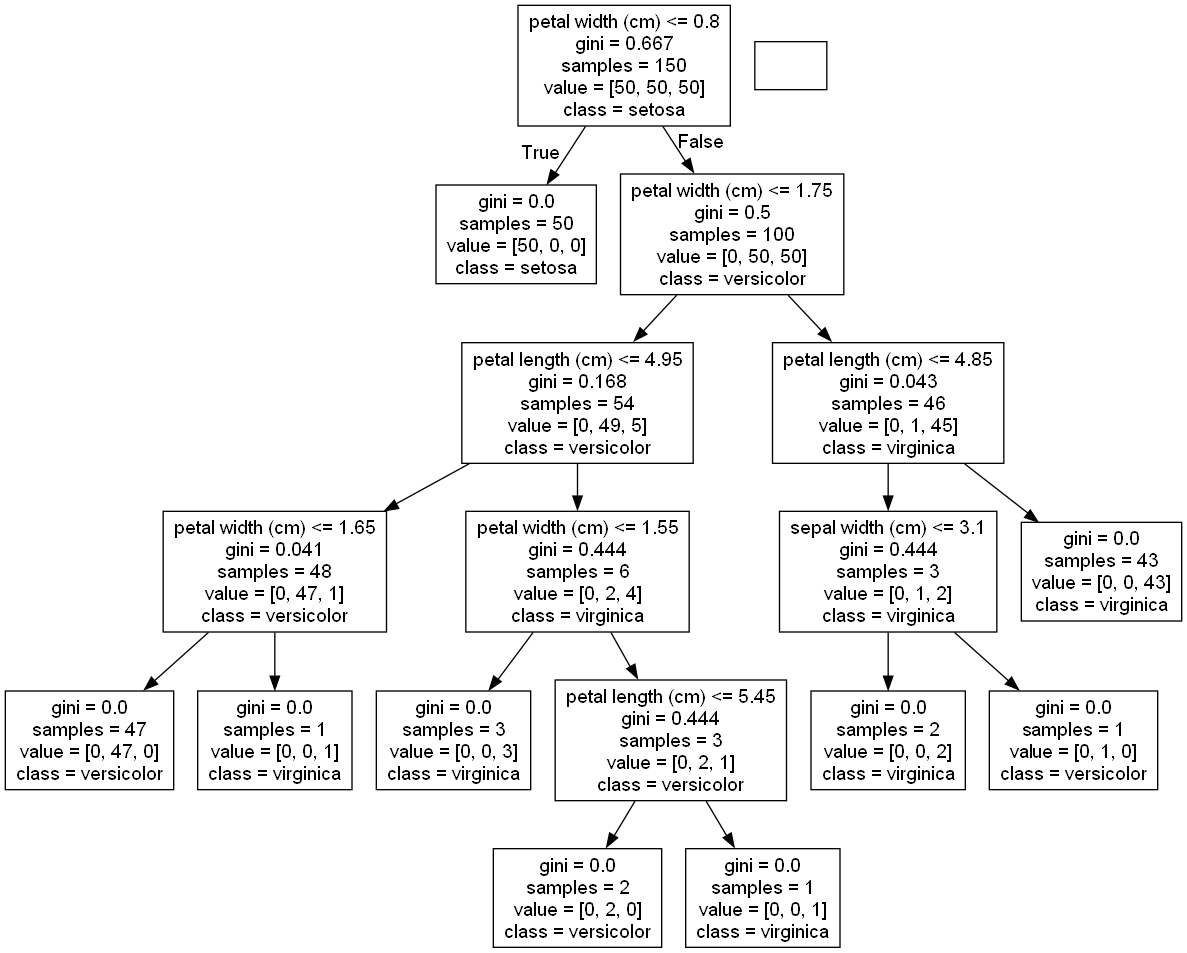

In [8]:
# 그래프를 출력합니다
Image(graph.create_png())

In [9]:
# pdf를 만듭니다
graph.write_pdf('iris.pdf')

True

In [10]:
# png 파일을 만듭니다
graph.write_png('iris.png')

True

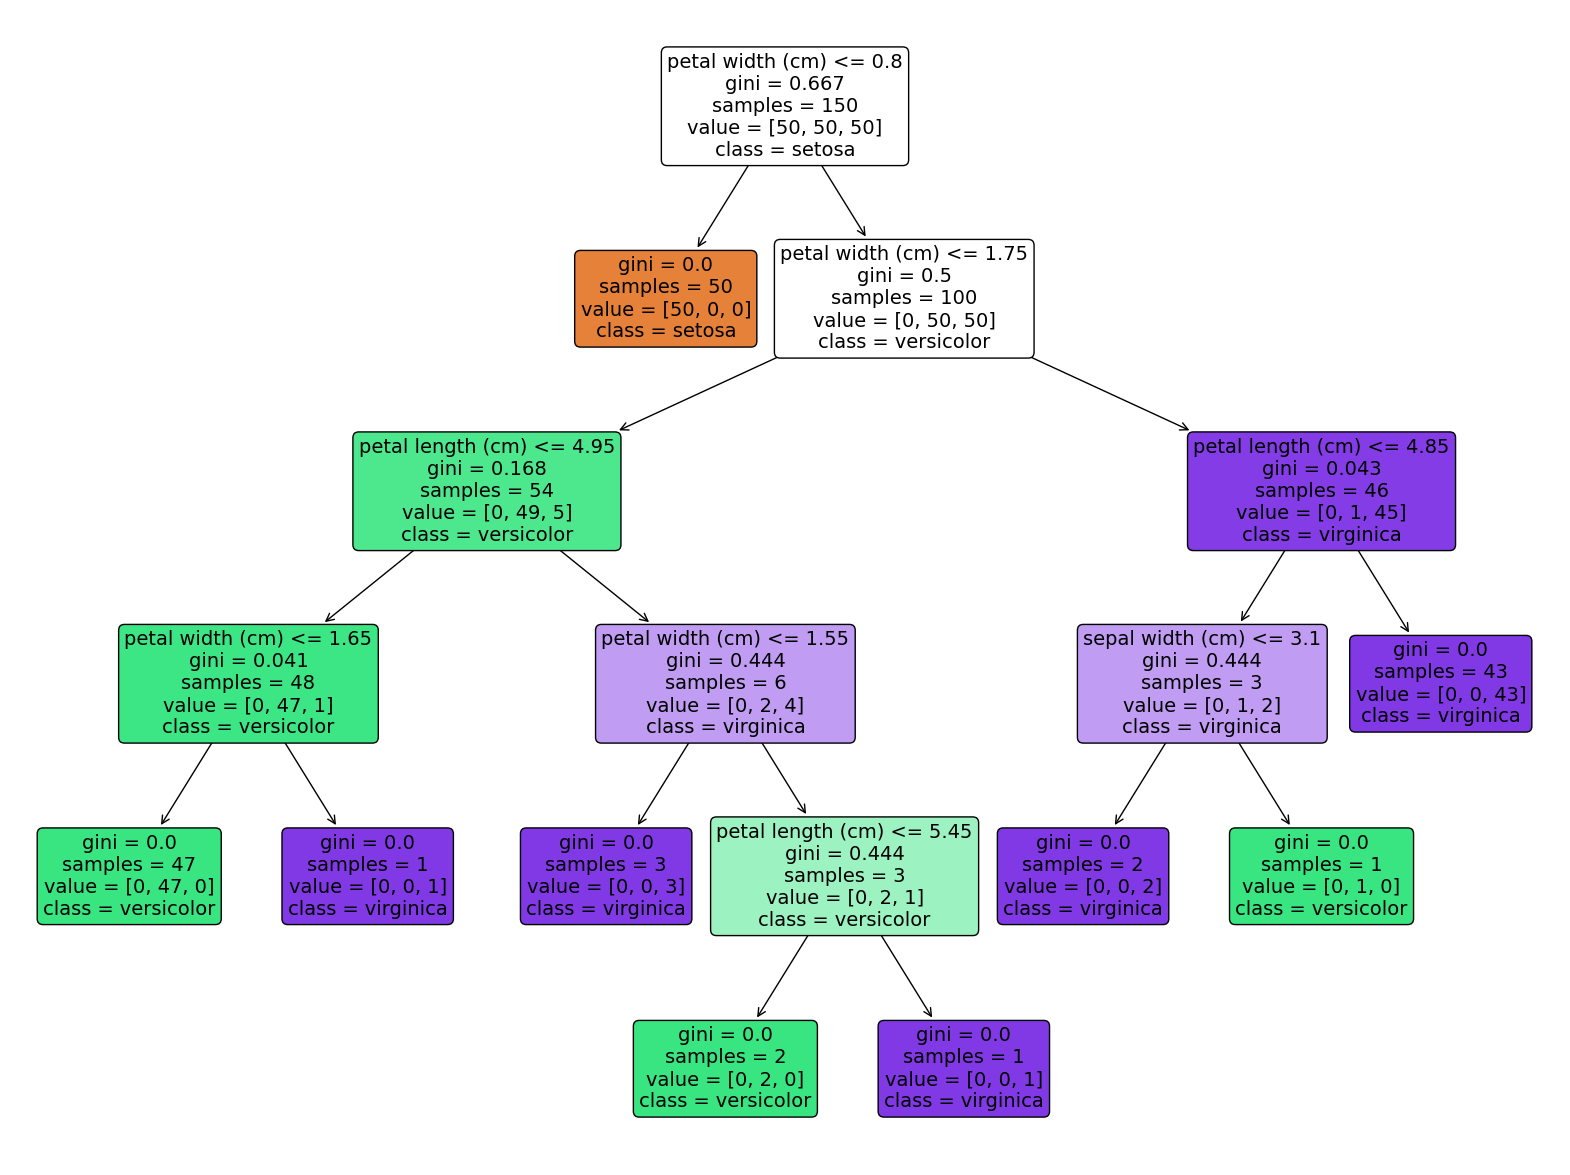

In [13]:
# 노드 색상 채우기
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
tree.plot_tree(model, filled=True,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True, fontsize=14)
plt.show()

# 14.4 랜덤 포레스트 분류기 훈련하기

In [14]:
# 라이브러리를 임포트합니다
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [20]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [21]:
# 랜덤 포레스트 분류기 객체를 만듭니다
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [22]:
# 모델을 훈련합니다
model = randomforest.fit(features, target)

- 샘플 예측

In [23]:
# 새로운 샘플을 만듭니다
observation = [[5,4,3,2]]

In [24]:
# 샘플 클래스를 예측합니다
model.predict(observation)

array([1])

- 분할 품질의 측정방식 변경

In [25]:
# 엔트로피를 사용하여 랜덤 포레스트 분류기 객체를 만듭니다
randomforest_entropy = RandomForestClassifier(criterion='entropy', random_state=0)

In [26]:
# 모델을 훈련합니다
model_entropy = randomforest_entropy.fit(features, target)

# 14.5 랜덤 포레스트 회귀 훈련하기

In [27]:
# 라이브러리를 임포트합니다
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [28]:
# 데이터를 로드하고 두 개의 특성만 선택합니다
housing = datasets.fetch_california_housing()
features = housing.data[:,0:2]
target   = housing.target

In [29]:
# 랜덤 포레스트 회귀 객체를 만듭니다
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

In [30]:
# 모델을 훈련합니다
model = randomforest.fit(features, target)

# 14.6 랜덤 포레스트에서 중요한 특성 구분하기

In [31]:
# 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [32]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [33]:
# 랜덤 포레스트 분류기 객체를 만듭니다
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [34]:
# 모델을 훈련합니다
model = randomforest.fit(features, target)

In [36]:
# 특성 중요도를 계산합니다
importances = model.feature_importances_

In [37]:
# 특성 중요도를 내림차순으로 정렬합니다
indices = np.argsort(importances)[::-1]

In [40]:
# 정렬된 특성 중요도에 따라 특성의 이름을 나열합니다
names = [iris.feature_names[i] for i in indices]

In [41]:
# 그래프를 만듭니다
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

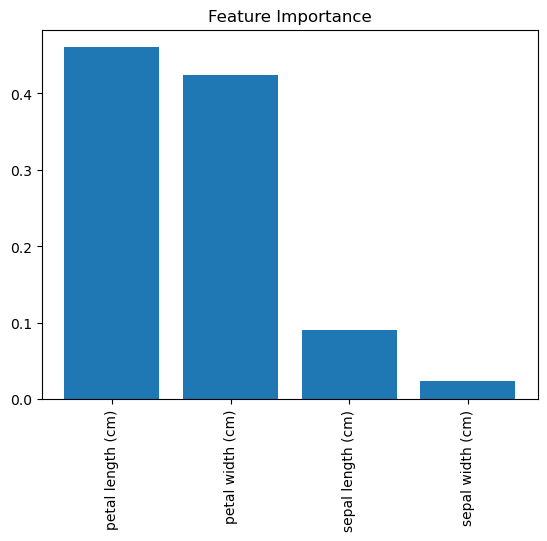

In [49]:
# 그래프 제목을 지정합니다
plt.title('Feature Importance')

# 막대 그래프를 추가합니다
plt.bar(range(features.shape[1]), importances[indices])

# x축 레이블로 특성 이름을 사용합니다
plt.xticks(range(features.shape[1]), names, rotation=90)

# 그래프를 출력합니다
plt.show()

In [50]:
# 특성 중요도를 확인합니다
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

- 랜덤포레스트와 결정트리의 특성 중요도 비교

In [51]:
# 결정 트리 분류기를 만듭니다
decisiontree = DecisionTreeClassifier(random_state=0)

In [52]:
# 모델을 훈련합니다
model = decisiontree.fit(features, target)

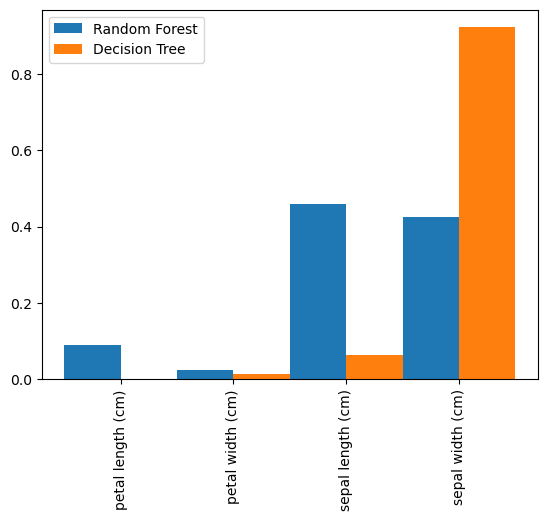

In [56]:
# 랜덤 포레스트와 결정트리의 특성 중요도를 비교합니다
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(features.shape[1])-0.25,
                randomforest.feature_importances_, 0.5,
                label='Random Forest')
rects2 = ax.bar(np.arange(features.shape[1])+0.25,
                model.feature_importances_, 0.5,
                label='Decision Tree')
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.legend()
plt.show()

# 14.7 랜덤 포레스트에서 중요한 특성 선택하기

In [57]:
# 라이브러리를 임포트합니다
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

In [58]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [59]:
# 랜덤 포레스트 분류기를 만듭니다
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

In [62]:
# 특성 중요도가 임곗값보다 크거나 같은 특성으로 객체를 만듭니다
selector = SelectFromModel(randomforest, threshold=0.3)

In [63]:
# selector를 사용하여 새로운 특성 행렬을 만듭니다
features_important = selector.fit_transform(features, target)

In [64]:
# 가장 중요한 특성을 사용하여 랜덤 포레스트 모델을 훈련합니다
model = randomforest.fit(features_important, target)

# 14.8 불균형한 클래스 다루기

In [65]:
# 라이브러리를 임포트합니다
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [71]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [72]:
# 처음 40개의 샘플을 제거하여 불균형한 데이터를 만듭니다
features = features[40:,:]
target   = target[40:]

In [73]:
# 0인 클래스 이외에는 모두 1인 타겟 벡터를 만듭니다
target = np.where((target == 0), 0, 1)

In [74]:
# 랜덤 포레스트 분류기 객체를 만듭니다
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')

In [75]:
# 모델을 훈련합니다
model = randomforest.fit(features, target)

- 클래스 가중치 계산

In [76]:
110/(2*10)

5.5

In [77]:
110/(2*100)

0.55

# 14.9 트리 크기 제어하기

In [78]:
# 라이브러리를 임포트합니다
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [79]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [81]:
# 결정 트리 분류기를 만듭니다
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

In [82]:
# 모델을 훈련합니다
model = decisiontree.fit(features, target)

# 14.10 부스팅을 사용하여 성능 향상하기

In [1]:
# 라이브러리를 임포트합니다
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

In [2]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [3]:
# 에이다부스트 트리 분류기의 객체를 만듭니다
adaboost = AdaBoostClassifier(random_state=0)

In [4]:
# 모델을 훈련합니다
model = adaboost.fit(features, target)

- 그레이디언트 부스팅

In [5]:
# 라이브러리를 임포트합니다
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
# 그레이디언트 부스팅 분류기의 객체를 만듭니다
gradientboost = GradientBoostingClassifier(random_state=0)

In [7]:
# 모델을 훈련합니다
model = gradientboost.fit(features, target)

- 히스토그램 기반 그레디언트 부스팅

In [11]:
# 히스토그램 기반의 그레이디언트 부스팅을 활성화하고 라이브러리를 임포트합니다
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [12]:
# 히스토그램 기반의 그레디언트 부스팅 분류기의 객체를 만듭니다
histgradientboost = HistGradientBoostingClassifier(random_state=0)

In [13]:
# 모델을 훈련합니다
model = histgradientboost.fit(features, target)

# 14.11 OOB 데이터로 랜덤 포레스트 평가하기

In [15]:
# 라이브러리를 임포트합니다
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [16]:
# 데이터를 로드합니다
iris = datasets.load_iris()
features = iris.data
target   = iris.target

In [17]:
# 랜덤 포레스트 분류기의 객체를 만듭니다
randomforest = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)

In [18]:
# 모델을 훈련합니다
model = randomforest.fit(features, target)

In [19]:
# OOB 오차를 확인합니다
randomforest.oob_score_

0.9533333333333334

- Bagging OOB

In [20]:
# 라이브러리를 임포트합니다
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [21]:
# 배깅 분류기의 객체를 만듭니다
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=0, oob_score=True, n_jobs=-1)

In [22]:
# 모델을 훈련합니다
model = bagging.fit(features, target)

In [23]:
# OOB 오차를 확인합니다
model.oob_score_

0.9533333333333334